# EX1
Create data and implement PCA algorithm then visualize each step like the below figure.

## Create data

In [2]:
import numpy as np

np.random.seed(1234) # random seed for consistency

# step 1 : create data
mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T

In [7]:
class1_sample, class1_sample.shape

(array([[ 4.71435164e-01, -3.12651896e-01,  8.59588414e-01,
         -2.24268495e+00,  9.53324128e-01,  2.11836468e-03,
          1.32115819e+00, -6.55969344e-01,  1.31815155e+00,
         -1.81702723e+00, -3.97840228e-01,  1.04593826e+00,
          1.24712954e-01,  2.39096052e+00,  3.61419367e-02,
         -8.97156784e-01,  7.55413982e-01, -1.44581008e+00,
         -5.48242449e-01, -3.55130253e-02],
        [-1.19097569e+00, -7.20588733e-01, -6.36523504e-01,
          1.15003572e+00, -2.02125482e+00,  4.05453412e-01,
         -1.54690555e+00,  1.93421376e-01, -4.69305285e-01,
         -1.83108540e-01,  3.37437654e-01,  8.63717292e-01,
         -3.22794806e-01,  7.61995878e-02, -2.07497760e+00,
         -1.36794833e-01,  2.15268581e-01, -1.40197328e+00,
         -1.44619508e-01,  5.65738306e-01],
        [ 1.43270697e+00,  8.87162940e-01,  1.56963721e-02,
          9.91946022e-01, -3.34077366e-01,  2.89091941e-01,
         -2.02646325e-01,  5.53438911e-01,  6.75554085e-01,
          1.

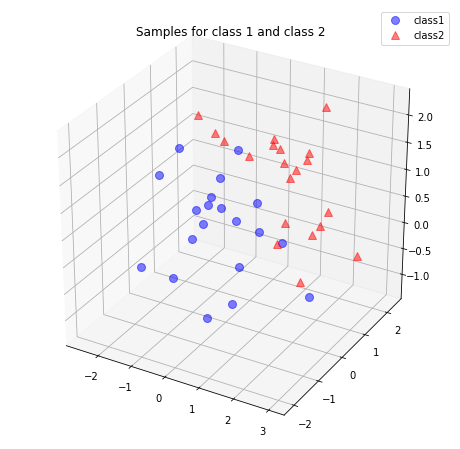

In [3]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

In [9]:
## ignoring the class labels
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)

In [10]:
## Step 2: Computing the d-dimensional mean vector
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

print('Mean Vector:\n', mean_vector)

Mean Vector:
 [[0.53513993]
 [0.3204501 ]
 [0.74643724]]


## Computing the Covariance Matrix

In [12]:
cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[ 1.77747533 -0.01148802 -0.06049908]
 [-0.01148802  1.10125532  0.15438341]
 [-0.06049908  0.15438341  0.6629143 ]]


## Computing eigenvectors and corresponding eigenvalues


In [16]:
# eigenvectors and eigenvalues for the from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print('Eigenvector {} from covariance matrix: {}'.format(i+1, eig_vec_cov[i]))
    print(40 * '-')

Eigenvalue 1 from covariance matrix: 1.78134534242452
Eigenvector 1 from covariance matrix: [ 0.99785694 -0.04649955 -0.04603605]
----------------------------------------
Eigenvalue 2 from covariance matrix: 0.6114759199824904
Eigenvector 2 from covariance matrix: [-0.03005032  0.2993114  -0.95368216]
----------------------------------------
Eigenvalue 3 from covariance matrix: 1.1488236852481977
Eigenvector 3 from covariance matrix: [-0.0581249  -0.95302176 -0.29727263]
----------------------------------------


**Bonus** : Checking the eigenvector-eigenvalue calculation
Let us quickly check that the eigenvector-eigenvalue calculation is correct and satisfy the equation

$$ \Sigma v = \lambda v $$
where
$ \Sigma = Covariance \ matrix \\  v= Eigenvector \\ \lambda =Eigenvalue$

In [21]:
for i in range(len(eig_val_cov)):
    eigv = eig_vec_cov[:,i].reshape(1,3).T
    np.testing.assert_array_almost_equal(cov_mat.dot(eigv), eig_val_cov[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)

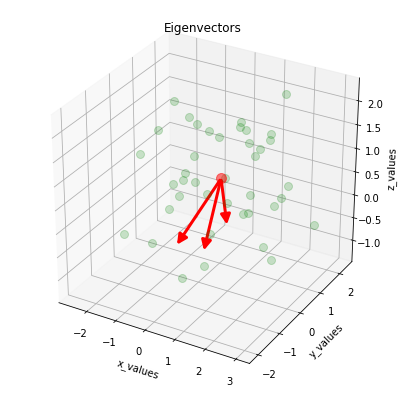

In [23]:
# Visualizing the eigenvectors
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec_cov.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

## Sorting the eigenvectors by decreasing eigenvalues

In [25]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_cov[i]), eig_vec_cov[:,i]) for i in range(len(eig_val_cov))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

1.78134534242452
1.1488236852481977
0.6114759199824904


## Choosing k eigenvectors with the largest eigenvalues

In [26]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.99785694 -0.04603605]
 [-0.03005032 -0.95368216]
 [-0.0581249  -0.29727263]]


## Transforming the samples onto the new subspace

In [27]:
transformed = matrix_w.T.dot(all_samples)


In [31]:
transformed.shape, all_samples.shape

((2, 40), (3, 40))

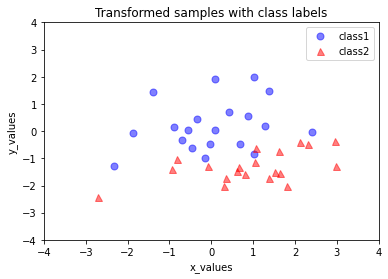

In [28]:
plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

# EX2:
Implement PCA algorithm to reduce dimension (2D) of iris dataset (https://archive.ics.uci.edu/ml/datasets/iris), then visualize  the result.

In [32]:
from sklearn import datasets

In [45]:
X = datasets.load_iris()['data']
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [44]:
y = datasets.load_iris()['target']
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [46]:
X.shape, y.shape

((150, 4), (150,))

In [42]:
class PCA_:

    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # Mean centering
        self.mean = np.mean(X, axis=0)
        X = X - self.mean
        # covariance, function needs samples as columns
        cov = np.cov(X.T)
        # eigenvalues, eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        # -> eigenvector v = [:,i] column vector, transpose for easier calculations
        # sort eigenvectors
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        # store first n eigenvectors
        self.components = eigenvectors[0:self.n_components]

    def transform(self, X):
        # project data
        X = X - self.mean
        return np.dot(X, self.components.T)

In [43]:
pca = PCA_(n_components= 2)

In [47]:
pca.fit(X)

In [49]:
X_trans = pca.transform(X)

In [50]:
X.shape, X_trans.shape

((150, 4), (150, 2))

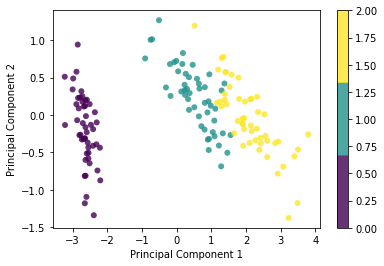

In [53]:
import matplotlib.pyplot as plt
plt.scatter(
       X_trans[:, 0], X_trans[:, 1], c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)
    )

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()

# EX3: 
Use PCA in sklearn to iris dataset and compare the result with the question 2.

In [54]:
from sklearn.decomposition import PCA
pca_sk = PCA(n_components=2)
trans_sk = pca_sk.fit_transform(X)

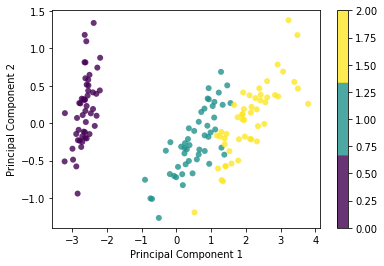

In [56]:
plt.scatter(
       trans_sk[:, 0], trans_sk[:, 1], c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)
    )

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()